In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O

In [7]:
print(os.listdir('D:\mall_kmean\Mall_Customers'))

['Mall_Customers.csv']


<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\sivaa\AppData\Local\Temp\ipykernel_25000\1336555295.py:1: SyntaxWarning: invalid escape sequence '\m'
  print(os.listdir('D:\mall_kmean\Mall_Customers'))


In [8]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [9]:

# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [10]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [16]:
import os

file_path = r'D:\mall_kmean\Mall_Customers.csv'
if os.path.exists(file_path):
    df1 = pd.read_csv(file_path, delimiter=',', nrows=nRowsRead)
    df1.dataframeName = 'Mall_Customers.csv'
    nRow, nCol = df1.shape
    print(f"DataFrame has {nRow} rows and {nCol} columns.")
else:
    print(f"File not found: {file_path}")


DataFrame has 200 rows and 5 columns.


In [17]:
df1.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


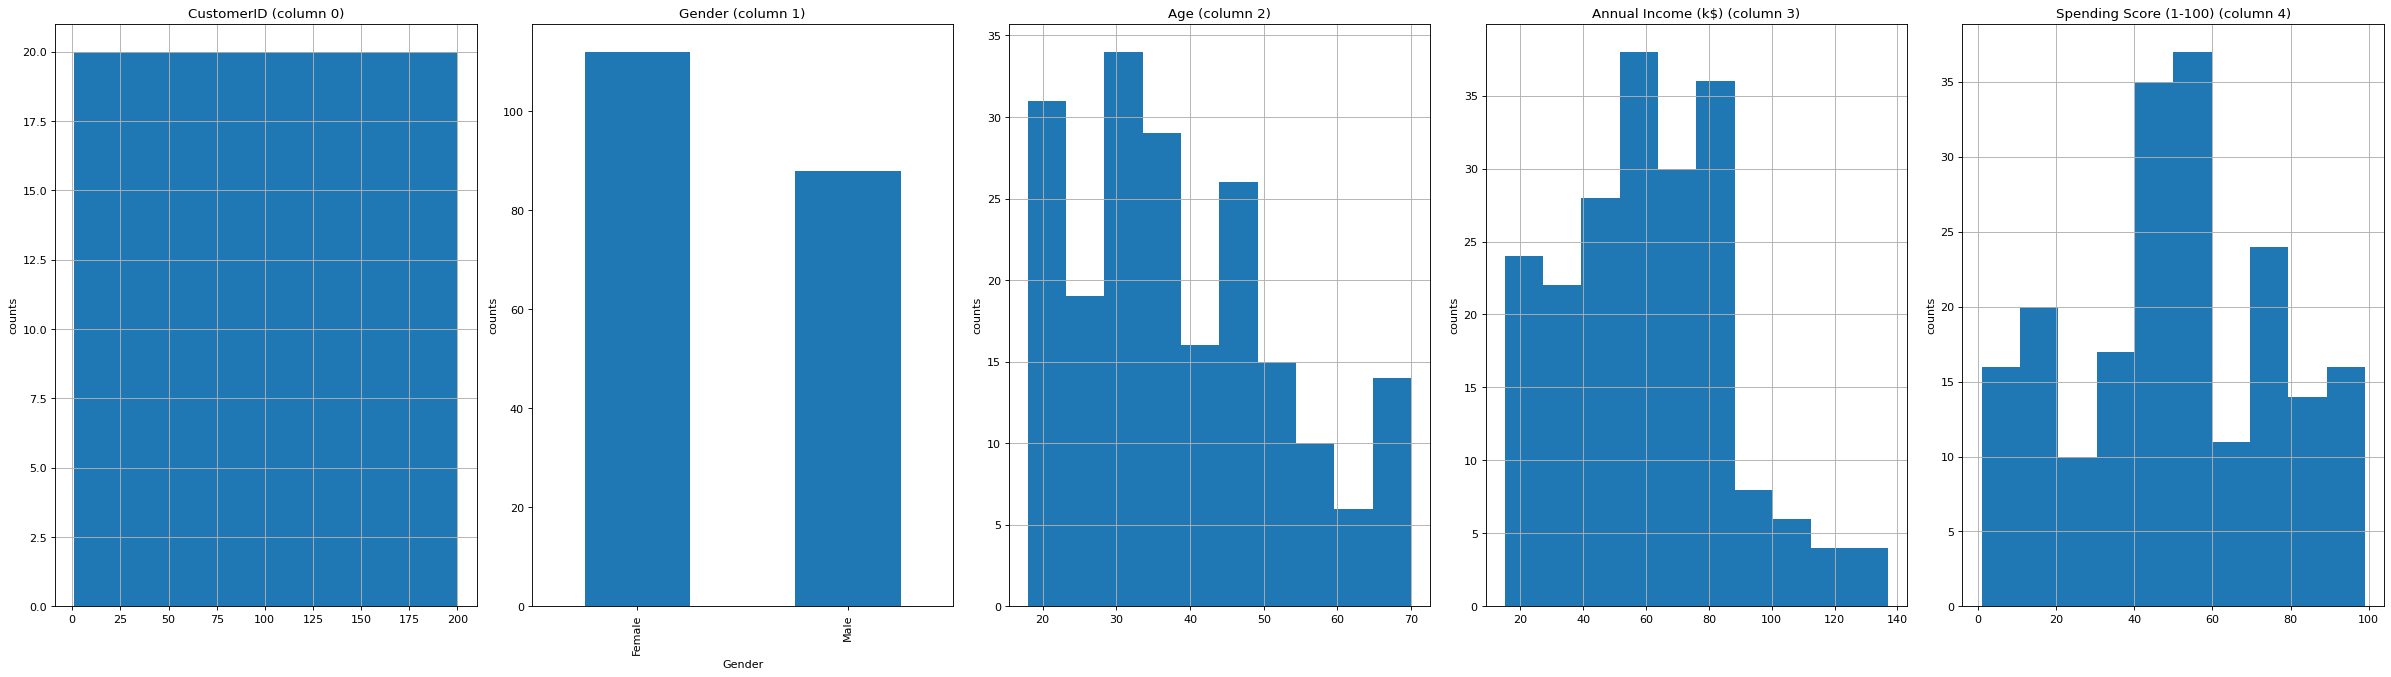

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nCol = df.shape[1]
    nRow = df.shape[0]
    nGraphRow = int(np.ceil(nGraphShown / nGraphPerRow))
    
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        
        if not np.issubdtype(columnDf.dtype, np.number):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
            
        plt.ylabel('counts')
        plt.title(f'{df.columns[i]} (column {i})')

    plt.tight_layout()
    plt.show()

# Example usage
nRowsRead = 1000  # specify 'None' if you want to read the whole file
df1 = pd.read_csv(r'D:\mall_kmean\Mall_Customers.csv', delimiter=',', nrows=nRowsRead)
plotPerColumnDistribution(df1, 10, 5)


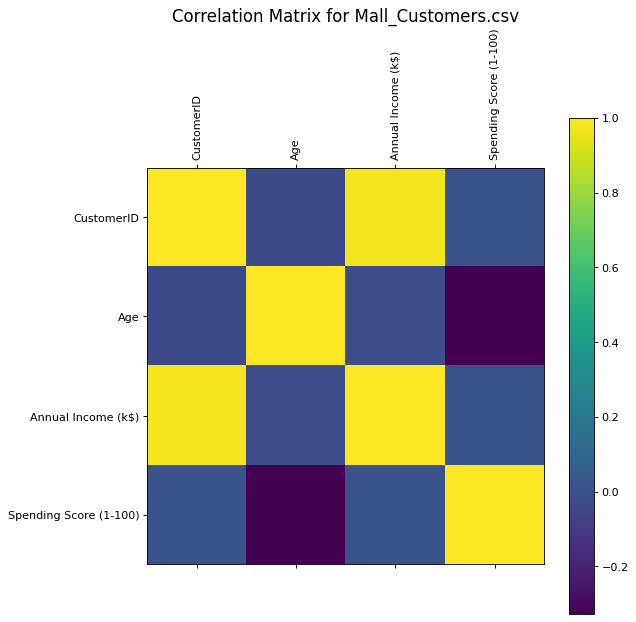

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plotCorrelationMatrix(df, graphWidth):
    filename = getattr(df, 'dataframeName', 'dataframe')
    
    # Drop columns with NaN values
    df = df.dropna(axis='columns')
    
    # Drop non-numeric columns
    df = df.select_dtypes(include=[np.number])
    
    # Keep columns where there are more than 1 unique values
    df = df[[col for col in df if df[col].nunique() > 1]]
    
    if df.shape[1] < 2:
        print(f"Correlation matrix not shown for the file {filename}, because it has less than 2 non-NAN or constant columns")
        return
    
    corr = df.corr()
    
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum=1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.colorbar(corrMat)
    plt.title(f"Correlation Matrix for {filename}", fontsize=15)
    plt.show()

# Example DataFrame creation
nRowsRead = 1000  # specify 'None' if you want to read the whole file
df1 = pd.read_csv(r'D:\mall_kmean\Mall_Customers.csv', delimiter=',', nrows=nRowsRead)
df1.dataframeName = 'Mall_Customers.csv'  # Ensure this line is included

# Example usage
plotCorrelationMatrix(df1, 8)
